# IMPORTING MODULES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

import tensorflow as tf
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Embedding, Dense, Conv1D, Flatten, Input, MaxPooling1D, Lambda
from tensorflow.keras import layers, models
from wordcloud import WordCloud

In [2]:
file = pd.read_csv("C:/Users/nsarr/Downloads/spam mail dataset 2/spam.csv")
df = pd.DataFrame(file)

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [5]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
file_2 = pd.read_csv("C:/Users/nsarr/Downloads/spam mail dataset/spam_ham_dataset.csv")
df2 = pd.DataFrame(file_2)

In [8]:
df2

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


# DATA CLEANING AND PRE-PROCESSING


In [9]:
df2=df2.drop(['Unnamed: 0','label_num'],axis=1)

In [10]:
df2

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


In [11]:
temp = df2.loc[df2['label'] == 'spam'].copy()

In [12]:
temp

,label,text
3,spam,"Subject: photoshop , windows , office . cheap ..."
7,spam,Subject: looking for medication ? we ` re the ...
10,spam,Subject: vocable % rnd - word asceticism\r\nvc...
11,spam,Subject: report 01405 !\r\nwffur attion brom e...
13,spam,Subject: vic . odin n ^ ow\r\nberne hotbox car...
...,...,...
5159,spam,Subject: pictures\r\nstreamlined denizen ajar ...
5161,spam,Subject: penny stocks are about timing\r\nnoma...
5162,spam,Subject: anomaly boys from 3881\r\nuosda apapr...
5164,spam,Subject: slutty milf wants to meet you\r\ntake...


In [13]:
temp = temp.iloc[0:501]

In [14]:
temp

,label,text
3,spam,"Subject: photoshop , windows , office . cheap ..."
7,spam,Subject: looking for medication ? we ` re the ...
10,spam,Subject: vocable % rnd - word asceticism\r\nvc...
11,spam,Subject: report 01405 !\r\nwffur attion brom e...
13,spam,Subject: vic . odin n ^ ow\r\nberne hotbox car...
...,...,...
1761,spam,Subject: this 12 minute movie will change your...
1763,spam,Subject: better get it now\r\nthis needs no in...
1770,spam,Subject: quick way to buy soft - ware\r\nvarie...
1774,spam,"Subject: usb charset = us - ascii "" >\r\nexter..."


In [15]:
temp['text'] = temp['text'].str.replace('Subject:','')

<ipython-input-15-0a20f4b5ba21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['text'] = temp['text'].str.replace('Subject:','')


In [16]:
temp

,label,text
3,spam,"photoshop , windows , office . cheap . main t..."
7,spam,looking for medication ? we ` re the best sou...
10,spam,vocable % rnd - word asceticism\r\nvcsc - bra...
11,spam,report 01405 !\r\nwffur attion brom est inst ...
13,spam,vic . odin n ^ ow\r\nberne hotbox carnal brid...
...,...,...
1761,spam,this 12 minute movie will change your life . ...
1763,spam,better get it now\r\nthis needs no introducti...
1770,spam,quick way to buy soft - ware\r\nvariety of to...
1774,spam,"usb charset = us - ascii "" >\r\nexternal fax ..."


In [17]:
df = df.rename(columns={'v1':'label','v2':'text'})

In [18]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
final = pd.concat([df,temp],axis=0)

In [20]:
final

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
1761,spam,this 12 minute movie will change your life . ...
1763,spam,better get it now\r\nthis needs no introducti...
1770,spam,quick way to buy soft - ware\r\nvariety of to...
1774,spam,"usb charset = us - ascii "" >\r\nexternal fax ..."


In [21]:
final = final.sample(frac=1).reset_index(drop=True)

In [22]:
final

,label,text
0,spam,Our brand new mobile music service is now live...
1,ham,Good afternoon sunshine! How dawns that day ? ...
2,spam,You are being contacted by our dating service ...
3,ham,7 lor... Change 2 suntec... Wat time u coming?
4,ham,Networking job is there.
...,...,...
6068,ham,Hi its in durban are you still on this number
6069,ham,Yeah get the unlimited
6070,ham,*deep sigh* ... I miss you :-( ... I am really...
6071,ham,Also hi wesley how've you been


In [23]:
final['label'].value_counts()

ham     4825
spam    1248
Name: label, dtype: int64

REMOVING PUNCTUATIONS

In [24]:
def remove_punctuations(text):
    trans = str.maketrans('','',string.punctuation)
    return text.translate(trans)

In [25]:
final['text'] = final['text'].apply(remove_punctuations)

In [26]:
final

,label,text
0,spam,Our brand new mobile music service is now live...
1,ham,Good afternoon sunshine How dawns that day Ar...
2,spam,You are being contacted by our dating service ...
3,ham,7 lor Change 2 suntec Wat time u coming
4,ham,Networking job is there
...,...,...
6068,ham,Hi its in durban are you still on this number
6069,ham,Yeah get the unlimited
6070,ham,deep sigh I miss you I am really surprised ...
6071,ham,Also hi wesley howve you been


In [27]:
final['text'] = final['text'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)

In [28]:
final

,label,text
0,spam,Our brand new mobile music service is now live...
1,ham,Good afternoon sunshine How dawns that day Ar...
2,spam,You are being contacted by our dating service ...
3,ham,7 lor Change 2 suntec Wat time u coming
4,ham,Networking job is there
...,...,...
6068,ham,Hi its in durban are you still on this number
6069,ham,Yeah get the unlimited
6070,ham,deep sigh I miss you I am really surprised ...
6071,ham,Also hi wesley howve you been


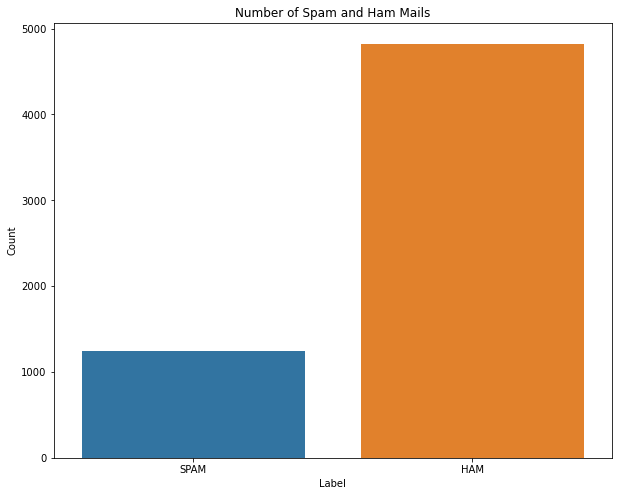

In [29]:
labels = ['SPAM','HAM']
count = [1248,4825]

plt.figure(figsize=(10,8))
sns.barplot(x=labels,y=count)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of Spam and Ham Mails')
plt.show()

In [30]:
spam_mesgs = ' '.join(final[final['label']=='spam']['text'])
# ham_mesgs = ' '.join(final[final['label'] == 'ham']['text'])

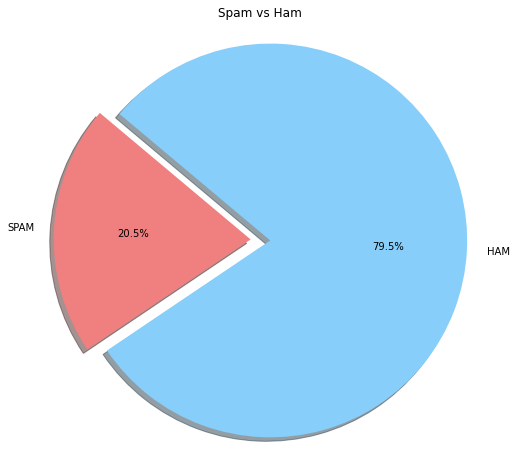

In [31]:
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

plt.figure(figsize=(8,8))
plt.pie(count,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Spam vs Ham')
plt.show()

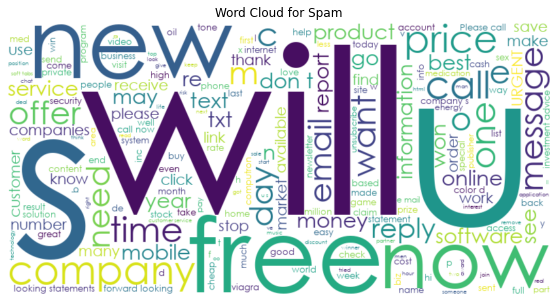

In [32]:
font_path = "C:/Users/nsarr/07558_CenturyGothic.ttf"

spam_wordcloud = WordCloud(width=800, height=400, background_color="white",font_path=font_path).generate(spam_mesgs)
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam')
plt.axis("off")
plt.show()

# MODEL BUILDING AND TRAINING

In [33]:
X = final['text']
y = final['label']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train.shape

(4858,)

In [36]:
y_train.shape

(4858,)

In [37]:
X_test.shape

(1215,)

In [38]:
y_test.shape

(1215,)

In [39]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X_train)
vocabulary_size = len(tokenizer.word_index) + 1

In [40]:
y_train = pd.Series(y_train)
y_train_encoded = y_train.factorize()[0]

In [41]:
y_train_encoded.shape

(4858,)

In [42]:
y_test = pd.Series(y_test)
y_test_encoded = y_test.factorize()[0]

In [43]:
y_test_encoded.shape

(1215,)

In [44]:
X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_test_encoded = tokenizer.texts_to_sequences(X_test)

In [45]:
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train_encoded, maxlen=100)
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test_encoded, maxlen=100)

In [46]:
class Capsule(tf.keras.Model):
    def __init__(self, num_capsules, dim_capsule):
        super(Capsule, self).__init__()

        self.num_capsules = num_capsules
        self.dim_capsule = dim_capsule

        self.dense = tf.keras.layers.Dense(num_capsules * dim_capsule, activation='relu')

    def call(self, inputs):
        x = self.dense(inputs)
        x = tf.reshape(x, [-1, x.shape[1]])

        # Squashing function
        x = x / tf.sqrt(tf.reduce_sum(tf.square(x), axis=-1, keepdims=True))

        return x


In [47]:
inputs = Input(shape=(100,))
embedding = Embedding(vocabulary_size, 64)(inputs)
# outputs = tf.reshape(embedding, [100, 2])

conv1d = Conv1D(filters=64, kernel_size=3, activation='relu')(embedding)
# conv1d_2 = Conv1D(filters=64, kernel_size=3, activation='relu')(conv1d)
max_pooling1d = MaxPooling1D(pool_size=2)(conv1d)
flatten = Flatten()(max_pooling1d)
capsule = Capsule(30, 4)(flatten)
outputs = Dense(1, activation='sigmoid')(capsule)

model_1 = tf.keras.Model(inputs=inputs, outputs=outputs)

In [48]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [49]:
X_train_padded.shape

(4858, 100)

In [50]:
y_train_encoded.shape

(4858,)

In [51]:
print(y_train_encoded)

[0 0 0 ... 0 1 0]


### UNBALANCED DATA - CAPSULE NETWORK

In [52]:
# Train the model
cap = model_1.fit(X_train_padded, y_train_encoded, epochs=10, batch_size = 10)

Epoch 1/10
486/486 [==============================] - 18s 32ms/step - loss: 0.2395 - accuracy: 0.9436
Epoch 2/10
486/486 [==============================] - 15s 31ms/step - loss: 0.0535 - accuracy: 0.9936
Epoch 3/10
486/486 [==============================] - 15s 31ms/step - loss: 0.0197 - accuracy: 0.9984
Epoch 4/10
486/486 [==============================] - 15s 31ms/step - loss: 0.0093 - accuracy: 0.9994
Epoch 5/10
486/486 [==============================] - 15s 31ms/step - loss: 0.0051 - accuracy: 0.9996
Epoch 6/10
486/486 [==============================] - 15s 31ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 7/10
486/486 [==============================] - 15s 31ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 8/10
486/486 [==============================] - 15s 31ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 9/10
486/486 [==============================] - 15s 31ms/step - loss: 8.3971e-04 - accuracy: 1.0000
Epoch 10/10
486/486 [==============================] - 15s 31ms/step - loss: 6

In [53]:
loss, accuracy_caps = model_1.evaluate(X_test_padded, y_test_encoded)

print('Test loss:', loss)
print('Test accuracy:', accuracy_caps)

38/38 [==============================] - 1s 8ms/step - loss: 0.0702 - accuracy: 0.9885
Test loss: 0.07021614909172058
Test accuracy: 0.988477349281311


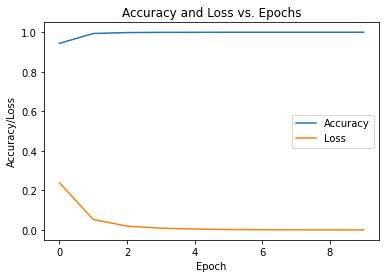

In [54]:
accuracy_1 = cap.history['accuracy']
loss = cap.history['loss']

plt.plot(accuracy_1, label='Accuracy')
plt.plot(loss, label='Loss')

plt.title('Accuracy and Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')

plt.legend()
plt.show()


In [56]:
predictions_1 = model_1.predict(X_test_padded)

# Convert the predictions to binary values (0 or 1)
binary_predictions = (predictions_1 > 0.5).astype(int)

# Print some sample predictions and actual values
for i in range(5):
    print(f"Sample {i+1}: Predicted={binary_predictions[i]}, Actual={y_test_encoded[i]}")

38/38 [==============================] - 1s 7ms/step
Sample 1: Predicted=[0], Actual=0
Sample 2: Predicted=[0], Actual=0
Sample 3: Predicted=[1], Actual=1
Sample 4: Predicted=[0], Actual=0
Sample 5: Predicted=[0], Actual=0


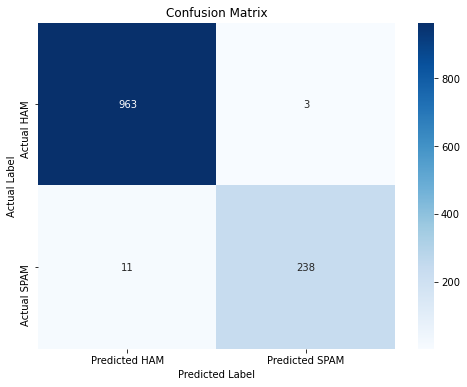

In [59]:
# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, binary_predictions)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual HAM', 'Actual SPAM'], columns=['Predicted HAM', 'Predicted SPAM'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

PREDICTIONS

In [60]:
def predict_label(model, tokenizer, message):
    # Tokenize and pad the message
    encoded_message = tokenizer.texts_to_sequences([message])
    padded_message = pad_sequences(encoded_message, maxlen=100, padding='post')

    # Predict the label for the message
    prediction = model.predict(padded_message)

    # Convert the prediction to a binary label (0 or 1)
    binary_prediction = 1 if prediction > 0.5 else 0
    
    final_label = "spam" if binary_prediction == 1 else "ham"

    return final_label

In [61]:
message = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

predicted_label = predict_label(model_1, tokenizer, message)

print(f"Predicted label for the message: {predicted_label}")

1/1 [==============================] - 0s 55ms/step
Predicted label for the message: spam


In [62]:
message = "Free entry in an exhibition to receive lottery ticket of 2000000"

predicted_label = predict_label(model_1, tokenizer, message)

print(f"Predicted label for the message: {predicted_label}")

1/1 [==============================] - 0s 51ms/step
Predicted label for the message: spam


In [63]:
message = "Save me please"
predicted_label = predict_label(model_1,tokenizer,message)
print(f"Predicted label for the message: {predicted_label}")

1/1 [==============================] - 0s 54ms/step
Predicted label for the message: ham


In [64]:
message = "hello the plan is on"
predicted_label = predict_label(model_1,tokenizer,message)
print(f"Predicted label for the message: {predicted_label}")

1/1 [==============================] - 0s 62ms/step
Predicted label for the message: ham


In [65]:
message = "Contact 9495672856 for redemption of your exciting cash price"
predicted_label = predict_label(model_1,tokenizer,message)
print(f"Predicted label for the message: {predicted_label}")

1/1 [==============================] - 0s 50ms/step
Predicted label for the message: spam


In [66]:
print(classification_report(y_test_encoded,np.around(predictions_1)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.96      0.97       249

    accuracy                           0.99      1215
   macro avg       0.99      0.98      0.98      1215
weighted avg       0.99      0.99      0.99      1215



SMOTE

In [67]:
from imblearn.over_sampling import SMOTE

# Assuming you have X_train_padded and y_train_encoded
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_padded, y_train_encoded)


In [68]:
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 3859, 1: 3859}


### BALANCED DATA - CAPSULE NETWORK

In [69]:
b_1 = model_1.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size = 10)

Epoch 1/10
772/772 [==============================] - 24s 31ms/step - loss: 0.0679 - accuracy: 0.9785
Epoch 2/10
772/772 [==============================] - 24s 31ms/step - loss: 0.0094 - accuracy: 0.9981
Epoch 3/10
772/772 [==============================] - 25s 32ms/step - loss: 0.0035 - accuracy: 0.9995
Epoch 4/10
772/772 [==============================] - 25s 32ms/step - loss: 9.7795e-04 - accuracy: 0.9997
Epoch 5/10
772/772 [==============================] - 25s 32ms/step - loss: 4.2365e-04 - accuracy: 1.0000
Epoch 6/10
772/772 [==============================] - 24s 31ms/step - loss: 2.6267e-04 - accuracy: 1.0000
Epoch 7/10
772/772 [==============================] - 25s 32ms/step - loss: 1.8054e-04 - accuracy: 1.0000
Epoch 8/10
772/772 [==============================] - 25s 32ms/step - loss: 1.1839e-04 - accuracy: 1.0000
Epoch 9/10
772/772 [==============================] - 25s 32ms/step - loss: 7.6119e-05 - accuracy: 1.0000
Epoch 10/10
772/772 [==============================] - 25s

In [70]:
loss, accuracy_caps = model_1.evaluate(X_test_padded, y_test_encoded)

print('Test loss:', loss)
print('Test accuracy:', accuracy_caps)

38/38 [==============================] - 0s 7ms/step - loss: 0.1491 - accuracy: 0.9761
Test loss: 0.14907501637935638
Test accuracy: 0.9761316776275635


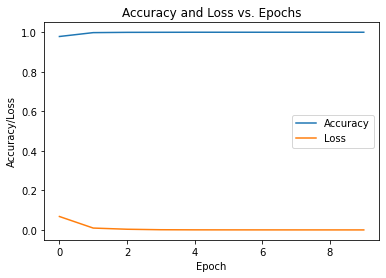

In [71]:
accuracy_b_1 = b_1.history['accuracy']
loss = b_1.history['loss']

plt.plot(accuracy_b_1, label='Accuracy')
plt.plot(loss, label='Loss')

plt.title('Accuracy and Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')

plt.legend()
plt.show()


PREDICTIONS

In [79]:
predictions_b_1 = model_1.predict(X_test_padded)

# Convert the predictions to binary values (0 or 1)
binary_predictions_b_1 = (predictions_b_1 > 0.5).astype(int)

# Print some sample predictions and actual values
for i in range(5):
    print(f"Sample {i+1}: Predicted={binary_predictions_b_1[i]}, Actual={y_test_encoded[i]}")

38/38 [==============================] - 0s 7ms/step
Sample 1: Predicted=[0], Actual=0
Sample 2: Predicted=[0], Actual=0
Sample 3: Predicted=[1], Actual=1
Sample 4: Predicted=[0], Actual=0
Sample 5: Predicted=[0], Actual=0


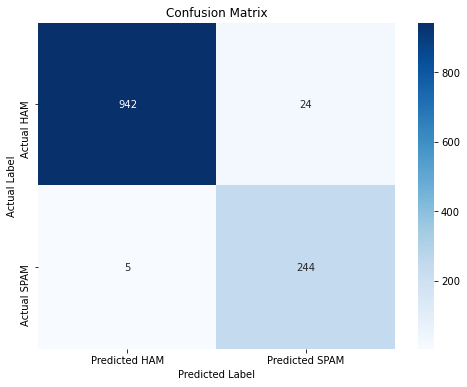

In [73]:
# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, binary_predictions_b_1)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual HAM', 'Actual SPAM'], columns=['Predicted HAM', 'Predicted SPAM'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### UNBALANCED - RNN

In [74]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [77]:
# Define the RNN model
model_2 = Sequential()
model_2.add(Embedding(vocabulary_size, 100, input_length=100))  # Use 'vocabulary_size' instead of 'len(word_index) + 1'
model_2.add(LSTM(5))
model_2.add(Dense(1, activation='sigmoid'))

# Compile and train the model
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
h = model_2.fit(X_train_padded, y_train_encoded, validation_data=(X_test_padded, y_test_encoded), epochs=10, batch_size=20)  # Use 'X_train_padded', 'y_train_encoded', 'X_test_padded', and 'y_test_encoded'

# Evaluate the model
loss, accuracy_rnn = model_2.evaluate(X_test_padded, y_test_encoded)  # Use 'X_test_padded' and 'y_test_encoded'
print('Test Loss:', loss)
print('Test Accuracy:', accuracy_rnn)

Epoch 1/10
243/243 [==============================] - 30s 103ms/step - loss: 0.3775 - accuracy: 0.8736 - val_loss: 0.1991 - val_accuracy: 0.9580
Epoch 2/10
243/243 [==============================] - 25s 101ms/step - loss: 0.1380 - accuracy: 0.9819 - val_loss: 0.1151 - val_accuracy: 0.9704
Epoch 3/10
243/243 [==============================] - 24s 100ms/step - loss: 0.0568 - accuracy: 0.9959 - val_loss: 0.0836 - val_accuracy: 0.9745
Epoch 4/10
243/243 [==============================] - 25s 101ms/step - loss: 0.0293 - accuracy: 0.9979 - val_loss: 0.0747 - val_accuracy: 0.9761
Epoch 5/10
243/243 [==============================] - 24s 97ms/step - loss: 0.0160 - accuracy: 0.9996 - val_loss: 0.0829 - val_accuracy: 0.9745
Epoch 6/10
243/243 [==============================] - 23s 96ms/step - loss: 0.0104 - accuracy: 0.9996 - val_loss: 0.0861 - val_accuracy: 0.9770
Epoch 7/10
243/243 [==============================] - 23s 96ms/step - loss: 0.0084 - accuracy: 0.9994 - val_loss: 0.0824 - val_accur

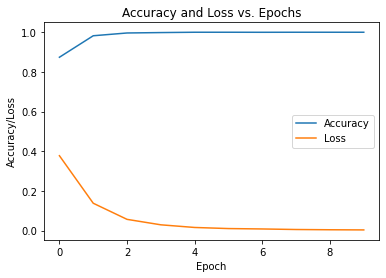

In [78]:
accuracy_2 = h.history['accuracy']
loss = h.history['loss']

plt.plot(accuracy_2, label='Accuracy')
plt.plot(loss, label='Loss')

plt.title('Accuracy and Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')

plt.legend()
plt.show()

PREDICTIONS

In [80]:
predictions_2 = model_2.predict(X_test_padded)

binary_predictions_2 = (predictions_2 > 0.5).astype(int)

# Print some sample predictions and actual values
for i in range(5):
    print(f"Sample {i+1}: Predicted={binary_predictions_2[i]}, Actual={y_test_encoded[i]}")


38/38 [==============================] - 2s 17ms/step
Sample 1: Predicted=[0], Actual=0
Sample 2: Predicted=[0], Actual=0
Sample 3: Predicted=[1], Actual=1
Sample 4: Predicted=[0], Actual=0
Sample 5: Predicted=[0], Actual=0


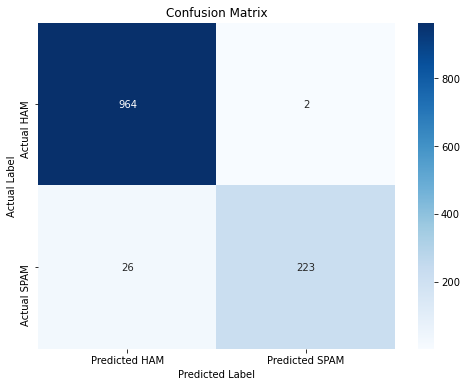

In [81]:
# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, binary_predictions_2)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual HAM', 'Actual SPAM'], columns=['Predicted HAM', 'Predicted SPAM'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### BALANCED DATA - RNN

In [82]:
b_2 = model_2.fit(X_train_resampled, y_train_resampled, validation_data=(X_test_padded, y_test_encoded), epochs=10, batch_size=32)

Epoch 1/10
242/242 [==============================] - 24s 100ms/step - loss: 0.1142 - accuracy: 0.9650 - val_loss: 0.0799 - val_accuracy: 0.9720
Epoch 2/10
242/242 [==============================] - 24s 98ms/step - loss: 0.0186 - accuracy: 0.9959 - val_loss: 0.0915 - val_accuracy: 0.9704
Epoch 3/10
242/242 [==============================] - 24s 98ms/step - loss: 0.0078 - accuracy: 0.9987 - val_loss: 0.0865 - val_accuracy: 0.9745
Epoch 4/10
242/242 [==============================] - 24s 100ms/step - loss: 0.0048 - accuracy: 0.9994 - val_loss: 0.0818 - val_accuracy: 0.9753
Epoch 5/10
242/242 [==============================] - 24s 100ms/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 0.0880 - val_accuracy: 0.9728
Epoch 6/10
242/242 [==============================] - 24s 99ms/step - loss: 0.0029 - accuracy: 0.9996 - val_loss: 0.0891 - val_accuracy: 0.9737
Epoch 7/10
242/242 [==============================] - 24s 100ms/step - loss: 0.0023 - accuracy: 0.9997 - val_loss: 0.0897 - val_accur

In [83]:
loss, accuracy_rnn = model_2.evaluate(X_test_padded, y_test_encoded)  # Use 'X_test_padded' and 'y_test_encoded'
print('Test Loss:', loss)
print('Test Accuracy:', accuracy_rnn)

38/38 [==============================] - 1s 19ms/step - loss: 0.0953 - accuracy: 0.9761
Test Loss: 0.09530740231275558
Test Accuracy: 0.9761316776275635


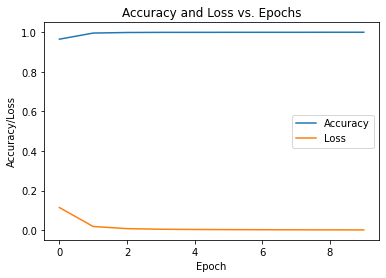

In [84]:
accuracy_b_2 = b_2.history['accuracy']
loss = b_2.history['loss']

plt.plot(accuracy_b_2, label='Accuracy')
plt.plot(loss, label='Loss')

plt.title('Accuracy and Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')

plt.legend()
plt.show()


PREDICTIONS

In [85]:
predictions_b_2 = model_2.predict(X_test_padded)

binary_predictions_b_2 = (predictions_b_2 > 0.5).astype(int)

# Print some sample predictions and actual values
for i in range(5):
    print(f"Sample {i+1}: Predicted={binary_predictions_b_2[i]}, Actual={y_test_encoded[i]}")


38/38 [==============================] - 1s 18ms/step
Sample 1: Predicted=[0], Actual=0
Sample 2: Predicted=[0], Actual=0
Sample 3: Predicted=[1], Actual=1
Sample 4: Predicted=[0], Actual=0
Sample 5: Predicted=[0], Actual=0


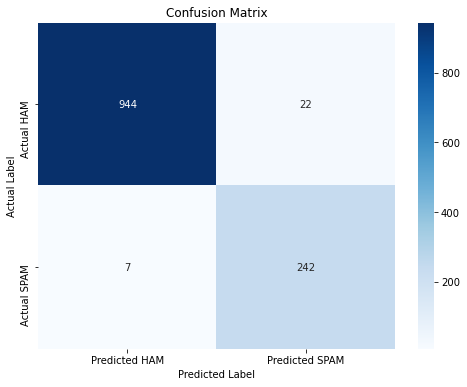

In [86]:
# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, binary_predictions_b_2)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual HAM', 'Actual SPAM'], columns=['Predicted HAM', 'Predicted SPAM'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### UNBALANCED - CNN

In [87]:
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

In [92]:
# Define the CNN model
model_3 = Sequential()
model_3.add(Embedding(vocabulary_size, 100, input_length=100))
model_3.add(Conv1D(100, 5, activation='relu'))
model_3.add(GlobalMaxPooling1D())
model_3.add(Dense(1, activation='sigmoid'))

# Compile and train the model
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
c = model_3.fit(X_train_padded, y_train_encoded, validation_data=(X_test_padded, y_test_encoded), epochs=10, batch_size=52)  # Use 'X_train_padded', 'y_train_encoded', 'X_test_padded', and 'y_test_encoded'


Epoch 1/10
94/94 [==============================] - 9s 72ms/step - loss: 0.3675 - accuracy: 0.8473 - val_loss: 0.1015 - val_accuracy: 0.9753
Epoch 2/10
94/94 [==============================] - 6s 69ms/step - loss: 0.0653 - accuracy: 0.9804 - val_loss: 0.0433 - val_accuracy: 0.9835
Epoch 3/10
94/94 [==============================] - 6s 69ms/step - loss: 0.0220 - accuracy: 0.9946 - val_loss: 0.0385 - val_accuracy: 0.9868
Epoch 4/10
94/94 [==============================] - 6s 68ms/step - loss: 0.0079 - accuracy: 0.9979 - val_loss: 0.0396 - val_accuracy: 0.9868
Epoch 5/10
94/94 [==============================] - 6s 68ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0437 - val_accuracy: 0.9852
Epoch 6/10
94/94 [==============================] - 6s 69ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0441 - val_accuracy: 0.9852
Epoch 7/10
94/94 [==============================] - 6s 68ms/step - loss: 8.3808e-04 - accuracy: 1.0000 - val_loss: 0.0476 - val_accuracy: 0.9852
Epoch 8/1

In [93]:
# Evaluate the model
loss, accuracy_cnn = model_3.evaluate(X_test_padded, y_test_encoded)  # Use 'X_test_padded' and 'y_test_encoded'
print('Test Loss:', loss)
print('Test Accuracy:', accuracy_cnn)

38/38 [==============================] - 0s 11ms/step - loss: 0.0507 - accuracy: 0.9852
Test Loss: 0.05066303536295891
Test Accuracy: 0.9851852059364319


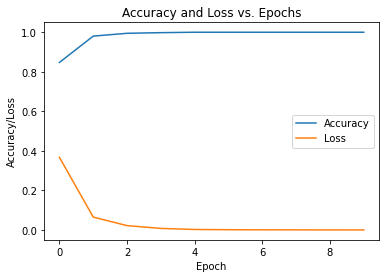

In [94]:
accuracy_3 = c.history['accuracy']
loss = c.history['loss']

plt.plot(accuracy_3, label='Accuracy')
plt.plot(loss, label='Loss')

plt.title('Accuracy and Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')

plt.legend()
plt.show()

PREDICTIONS

In [95]:
predictions_3 = model_3.predict(X_test_padded)

binary_predictions_3 = (predictions_3 > 0.5).astype(int)

# Print some sample predictions and actual values
for i in range(5):
    print(f"Sample {i+1}: Predicted={binary_predictions_3[i]}, Actual={y_test_encoded[i]}")


38/38 [==============================] - 1s 11ms/step
Sample 1: Predicted=[0], Actual=0
Sample 2: Predicted=[0], Actual=0
Sample 3: Predicted=[1], Actual=1
Sample 4: Predicted=[0], Actual=0
Sample 5: Predicted=[0], Actual=0


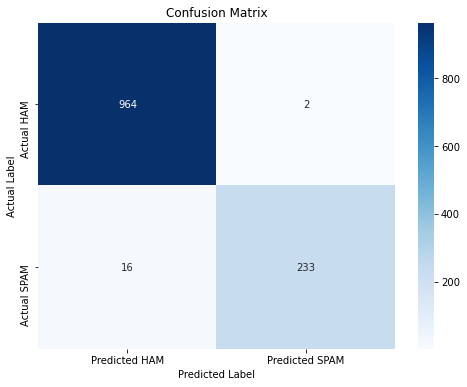

In [96]:
# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, binary_predictions_3)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual HAM', 'Actual SPAM'], columns=['Predicted HAM', 'Predicted SPAM'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### BALANCED - CNN

In [97]:
b_3 = model_3.fit(X_train_resampled, y_train_resampled, validation_data=(X_test_padded, y_test_encoded), epochs=10, batch_size=64)

Epoch 1/10
121/121 [==============================] - 9s 73ms/step - loss: 0.1212 - accuracy: 0.9607 - val_loss: 0.1083 - val_accuracy: 0.9663
Epoch 2/10
121/121 [==============================] - 9s 72ms/step - loss: 0.0153 - accuracy: 0.9959 - val_loss: 0.0946 - val_accuracy: 0.9695
Epoch 3/10
121/121 [==============================] - 9s 72ms/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0928 - val_accuracy: 0.9704
Epoch 4/10
121/121 [==============================] - 9s 73ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0905 - val_accuracy: 0.9728
Epoch 5/10
121/121 [==============================] - 9s 73ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0938 - val_accuracy: 0.9728
Epoch 6/10
121/121 [==============================] - 9s 73ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0879 - val_accuracy: 0.9761
Epoch 7/10
121/121 [==============================] - 9s 72ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0887 - val_accuracy: 0.9770

In [98]:
# Evaluate the model
loss, accuracy_cnn = model_3.evaluate(X_test_padded, y_test_encoded)  # Use 'X_test_padded' and 'y_test_encoded'
print('Test Loss:', loss)
print('Test Accuracy:', accuracy_cnn)

38/38 [==============================] - 0s 12ms/step - loss: 0.0869 - accuracy: 0.9786
Test Loss: 0.08690835535526276
Test Accuracy: 0.978600800037384


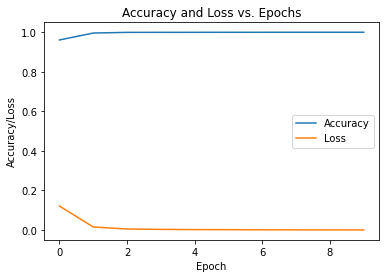

In [99]:
accuracy_b_3 = b_3.history['accuracy']
loss = b_3.history['loss']

plt.plot(accuracy_b_3, label='Accuracy')
plt.plot(loss, label='Loss')

plt.title('Accuracy and Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')

plt.legend()
plt.show()


PREDICTIONS

In [100]:
predictions_b_3 = model_3.predict(X_test_padded)

binary_predictions_b_3 = (predictions_b_3 > 0.5).astype(int)

# Print some sample predictions and actual values
for i in range(5):
    print(f"Sample {i+1}: Predicted={binary_predictions_b_3[i]}, Actual={y_test_encoded[i]}")


38/38 [==============================] - 0s 11ms/step
Sample 1: Predicted=[0], Actual=0
Sample 2: Predicted=[0], Actual=0
Sample 3: Predicted=[1], Actual=1
Sample 4: Predicted=[0], Actual=0
Sample 5: Predicted=[0], Actual=0


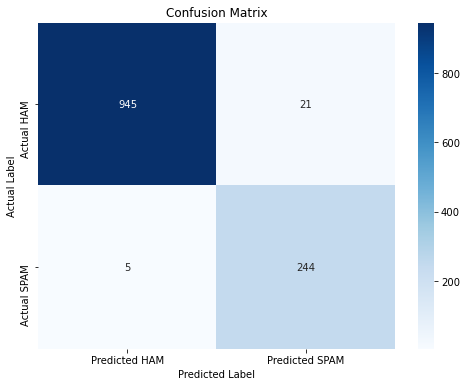

In [101]:
# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, binary_predictions_b_3)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual HAM', 'Actual SPAM'], columns=['Predicted HAM', 'Predicted SPAM'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### CLASSIFICATION REPORTS

In [102]:
#RNN
predictions_2 = model_2.predict(X_test_padded)
print(classification_report(y_test_encoded,np.around(predictions_2)))

38/38 [==============================] - 1s 18ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       966
           1       0.92      0.97      0.94       249

    accuracy                           0.98      1215
   macro avg       0.95      0.97      0.96      1215
weighted avg       0.98      0.98      0.98      1215



In [103]:
#CNN
predictions_3 = model_3.predict(X_test_padded)
print(classification_report(y_test_encoded,np.around(predictions_3)))

38/38 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       966
           1       0.92      0.98      0.95       249

    accuracy                           0.98      1215
   macro avg       0.96      0.98      0.97      1215
weighted avg       0.98      0.98      0.98      1215



In [104]:
#CapsNet
print(classification_report(y_test_encoded,np.around(predictions_1)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.96      0.97       249

    accuracy                           0.99      1215
   macro avg       0.99      0.98      0.98      1215
weighted avg       0.99      0.99      0.99      1215



### COMBINED TEST ACCURACIES OF UNBALANCED DATA

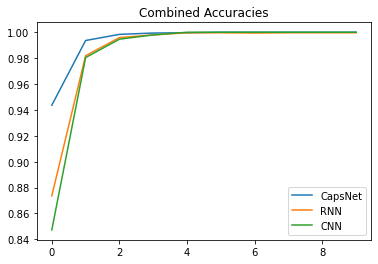

In [105]:
plt.plot(accuracy_1, label='CapsNet')
plt.plot(accuracy_2, label='RNN')
plt.plot(accuracy_3, label='CNN')

plt.title("Combined Accuracies")

plt.legend()
plt.show()

### COMBINED TEST ACCURACIES OF BALANCED DATA

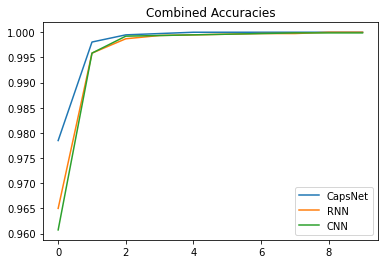

In [106]:
plt.plot(accuracy_b_1, label='CapsNet')
plt.plot(accuracy_b_2, label='RNN')
plt.plot(accuracy_b_3, label='CNN')

plt.title("Combined Accuracies")

plt.legend()
plt.show()